In [5]:
import healpy as h
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [549]:
nside=256 ; npix=h.nside2npix(nside) ; lmax=2*nside
cltemp=h.read_cl("../../data/cl_rem3.fits")
clr=[cltemp[0],cltemp[1],cltemp[2]*100.,cltemp[3]*0]

hiter=5

In [550]:
random.seed(20) ; tqu=h.synfast(clr,nside,lmax=lmax,pol=True,new=True)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


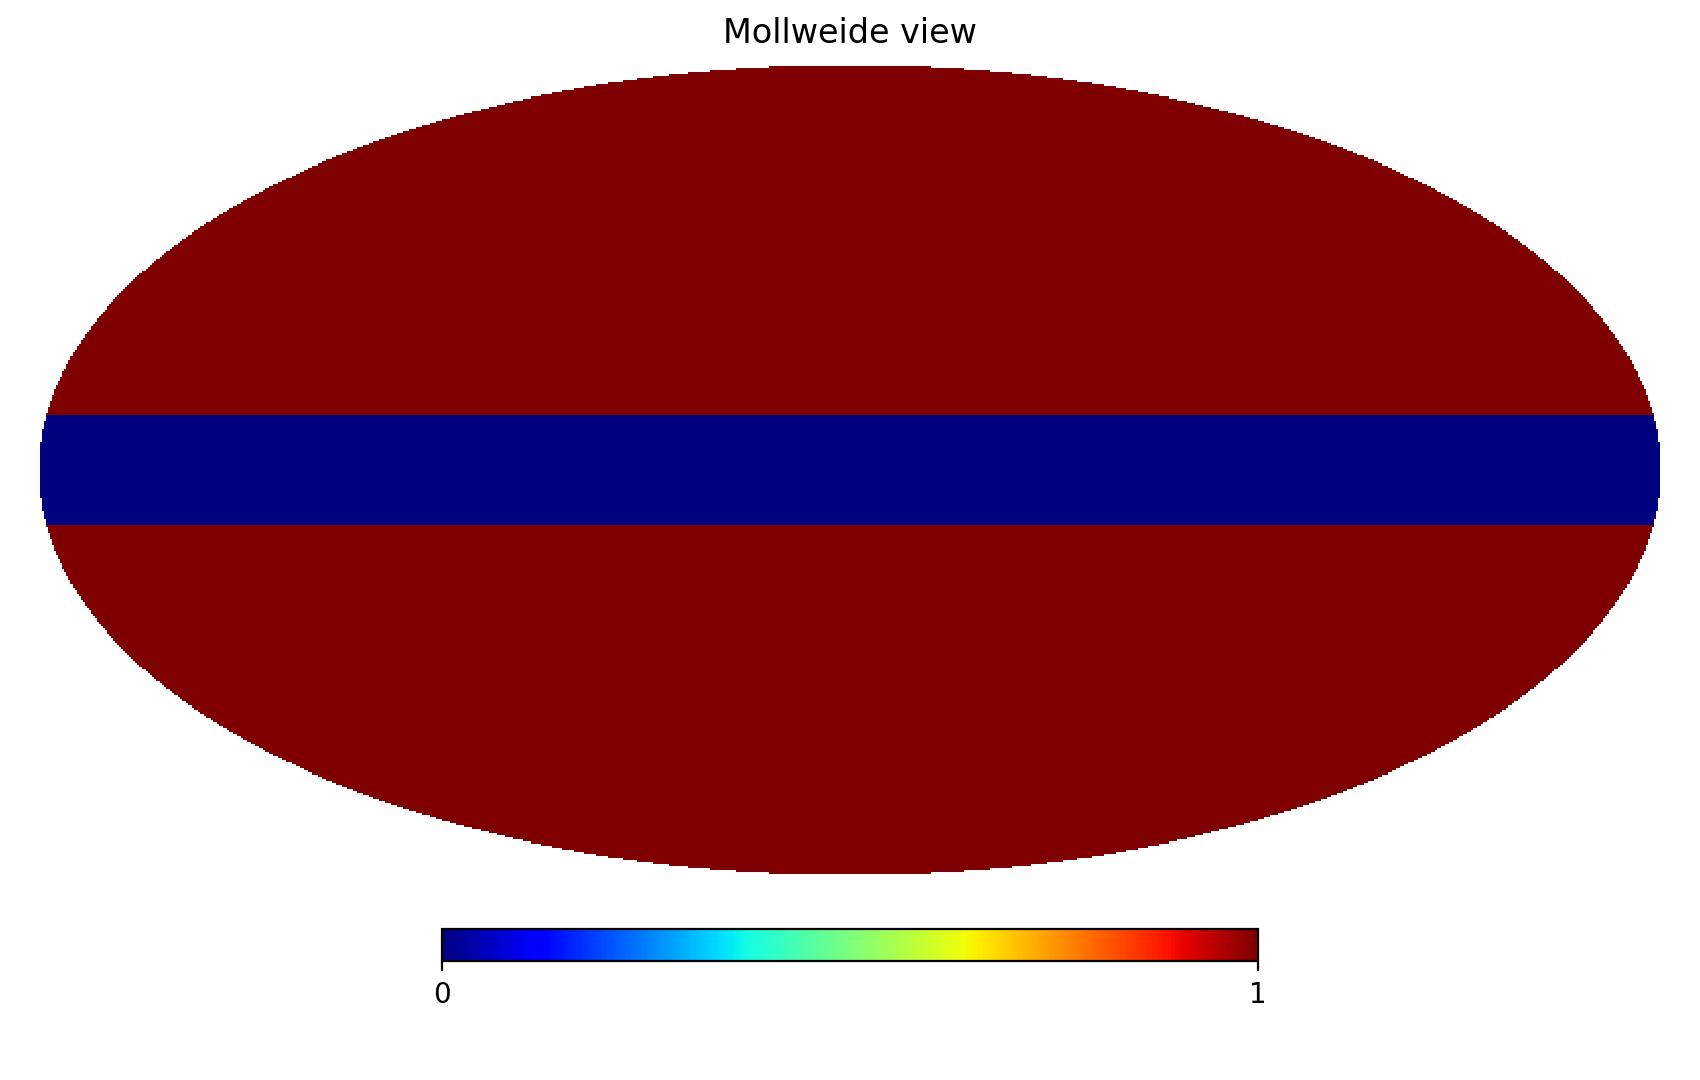

In [554]:
smask=zeros(npix,"double")
mask=zeros(npix,"double") ;apow=0.
theta=h.pix2ang(nside,arange(npix))[0]*180./pi
bw=10.

tmaxn=90-bw ; tmaxs=90+bw

for i in range(npix):
    if theta[i]<tmaxn-apow or theta[i]>tmaxs+apow:
            mask[i]=1.
    elif theta[i]>tmaxn and theta[i]<tmaxs:
            mask[i]=0.
    elif theta[i]<=tmaxn and theta[i]>=tmaxn-apow:
            x=(theta[i]-tmaxn+apow)*pi/(2.*apow)
            mask[i]=cos(x)**2.
    elif theta[i]>=tmaxs and theta[1]<=tmaxs+apow:
            x=(tmaxs+apow-theta[i])*pi/(2.*apow)
            mask[i]=cos(x)**2.
            
mask=mask
smask[theta<tmaxn-apow]=1. ; smask[theta>tmaxs+apow]=1.
#smask=1.-smask
h.mollview(mask)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


<IPython.core.display.Javascript object>


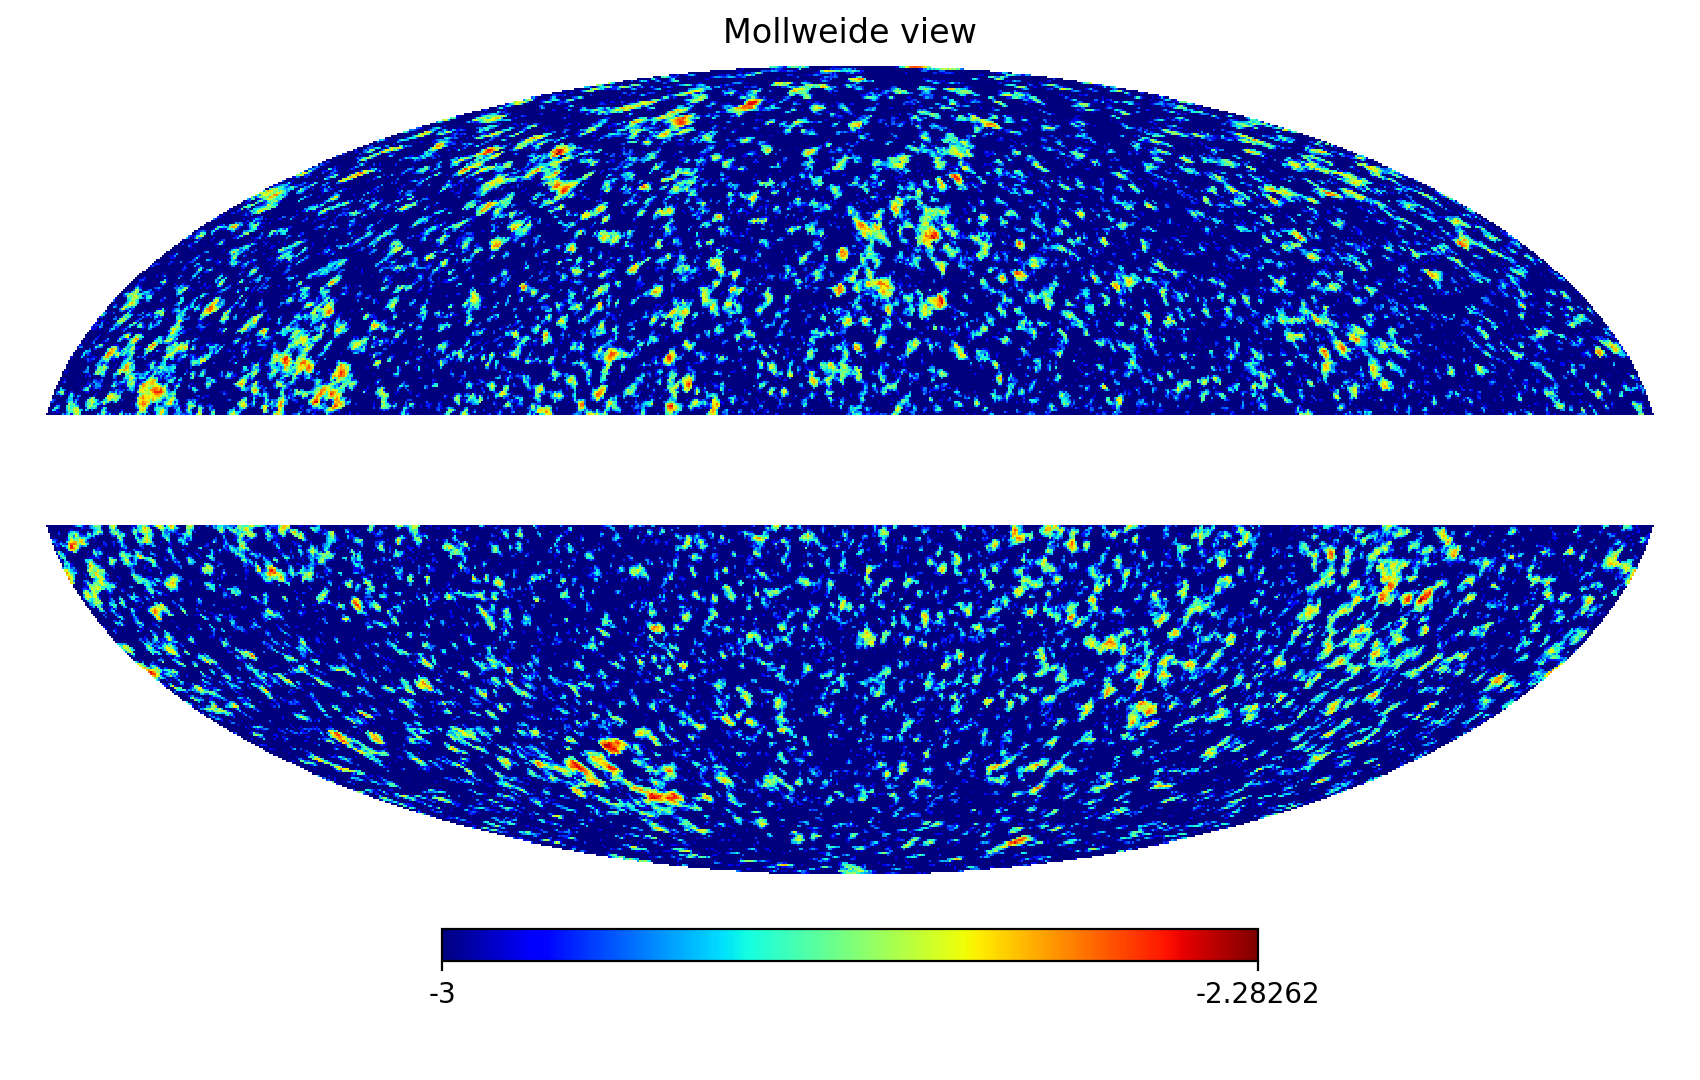

<IPython.core.display.Javascript object>


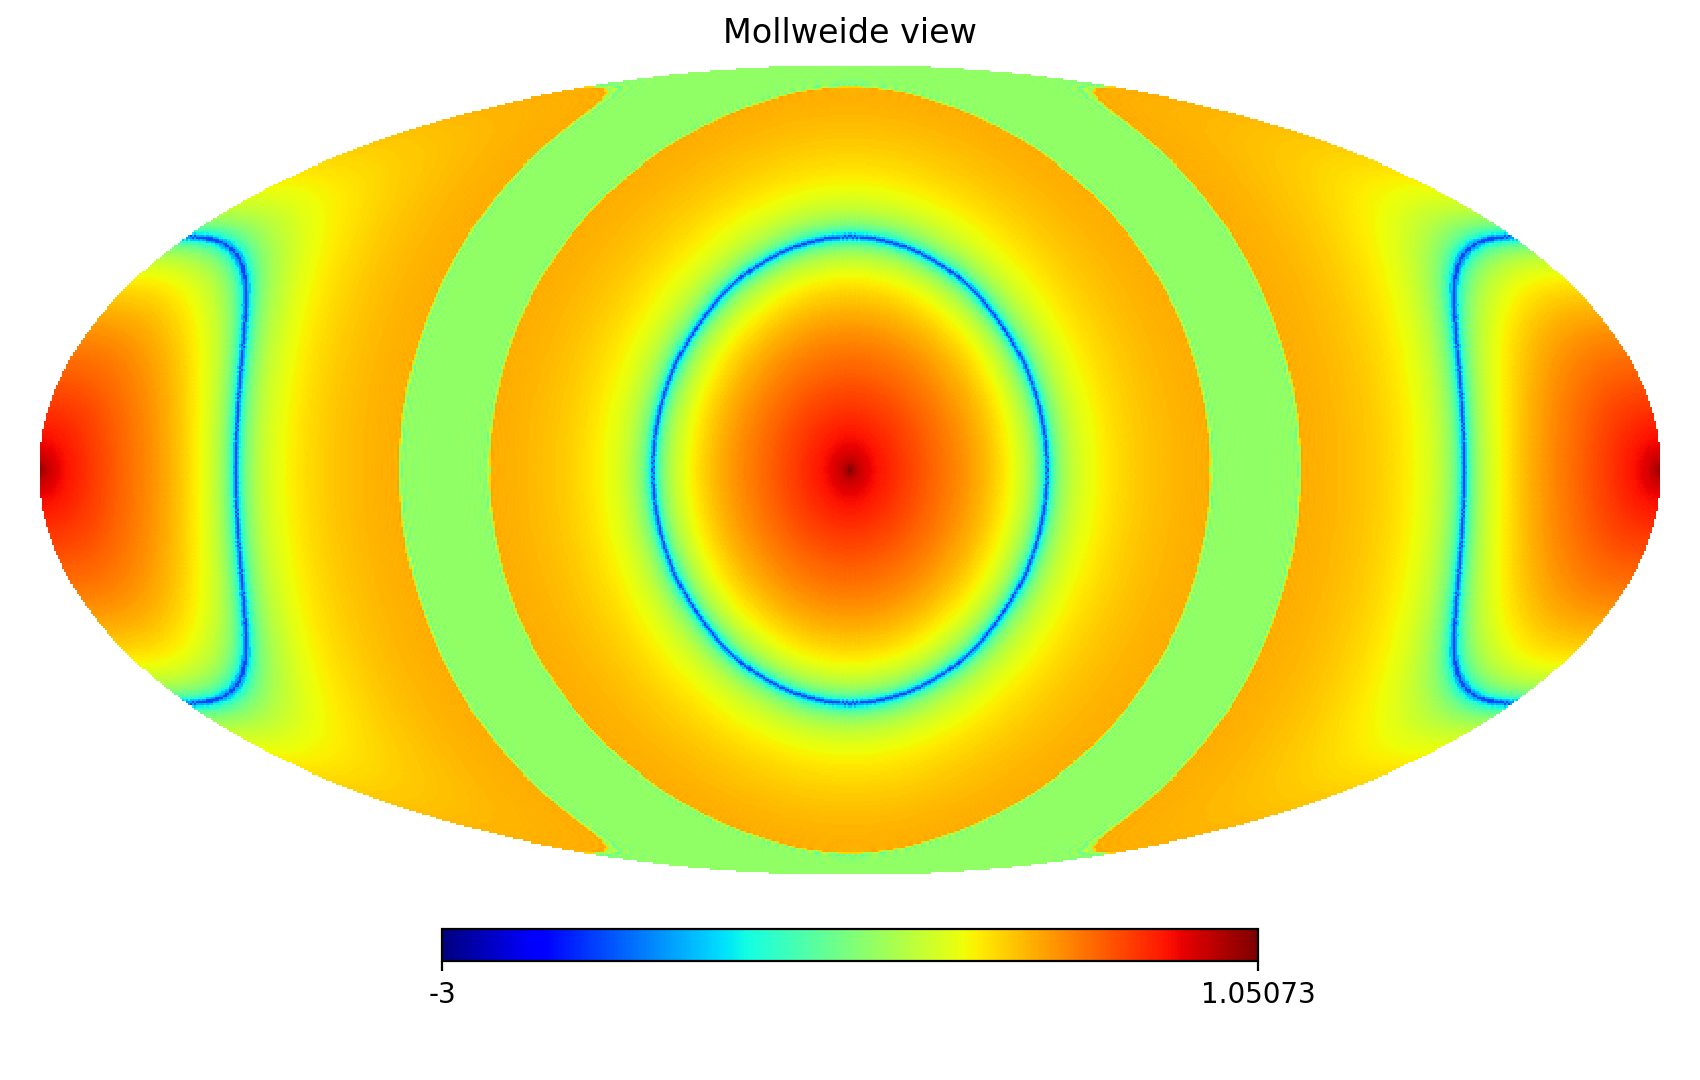

<IPython.core.display.Javascript object>


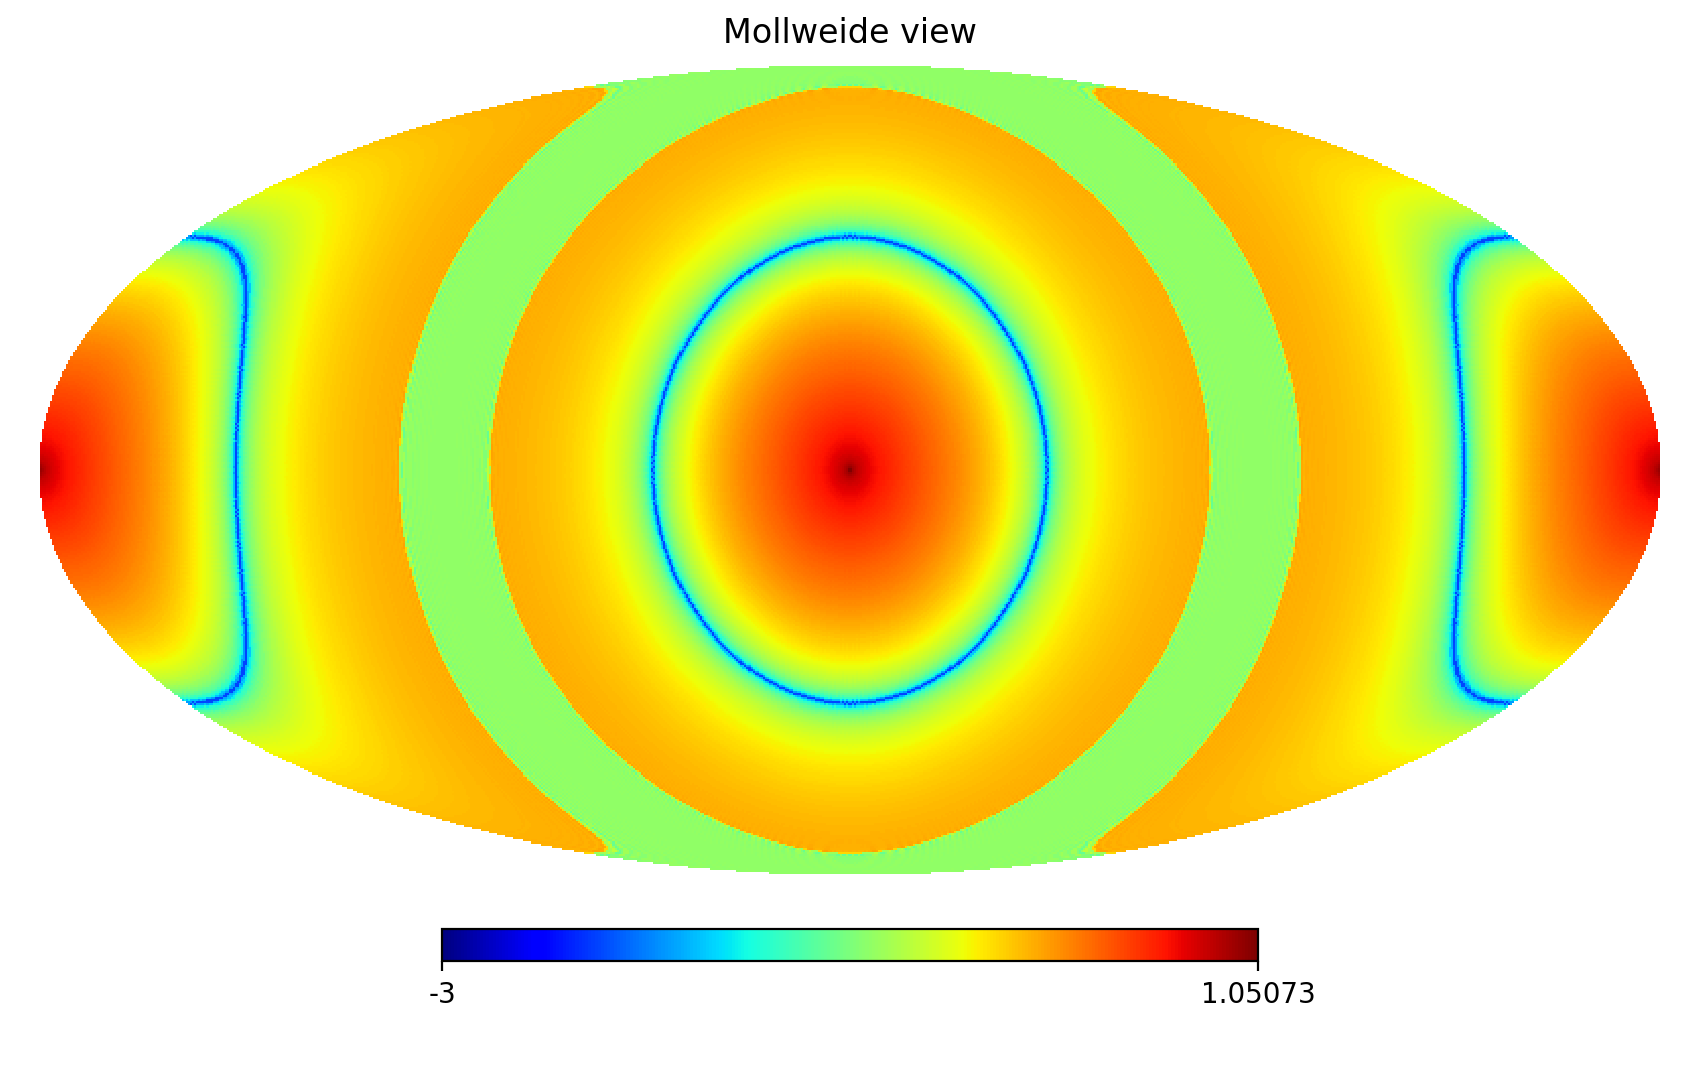

In [555]:
teb=h.alm2map(h.map2alm(tqu,lmax=lmax,iter=3),nside,pol=False)
tebm=h.alm2map(h.map2alm([mask,mask,mask],lmax=lmax,iter=3),nside,pol=False)
h.mollview(log10(abs(teb[2]*mask)),rot=(0,0),min=-3)
h.mollview(log10(abs(tebm[2])),rot=(0,90),min=-3)
h.mollview(log10(abs(tebm[1])),rot=(0,90),min=-3)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


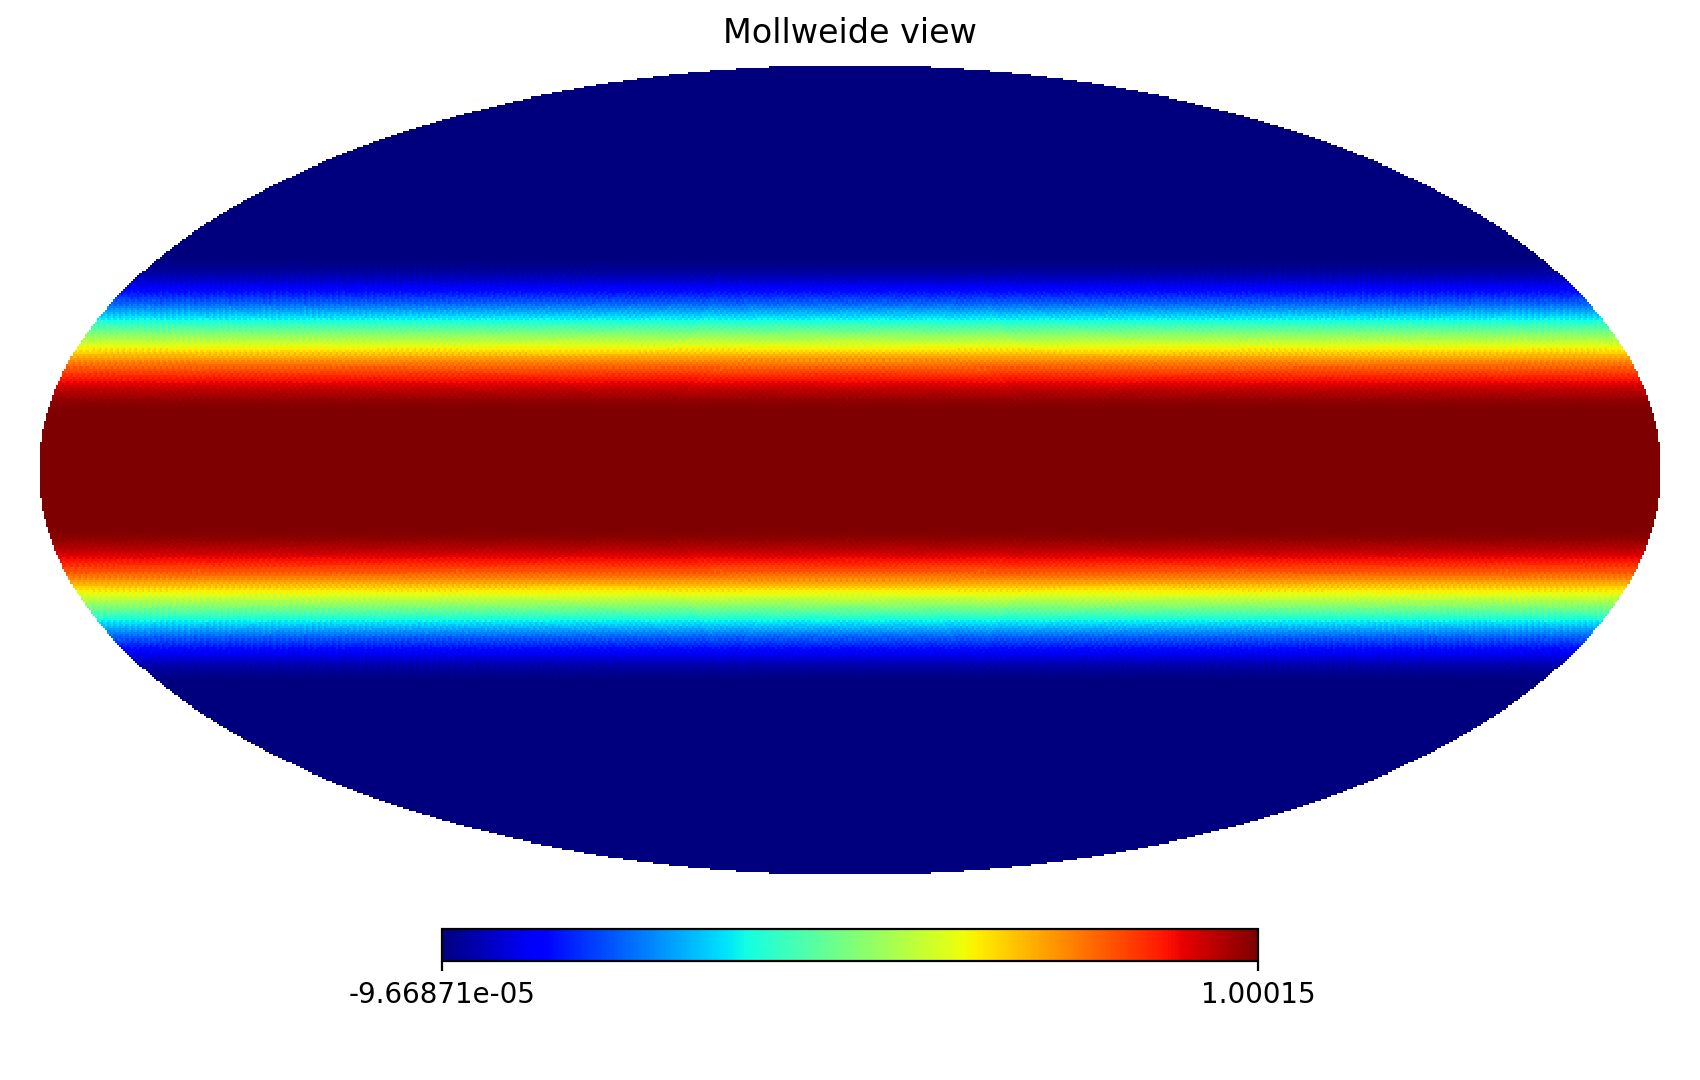

In [458]:
rmask=h.alm2map(h.map2alm(mask,lmax),nside)
h.mollview(rmask)

In [478]:
d=tqu*mask
cq=np.zeros(npix,"double")
cu=np.zeros(npix,"double")
cnt=-1

maxiter=100

In [479]:
for i in range(maxiter+1):
    din=[d[0],d[1][:]-cq[:],d[2][:]-cu[:]]
    htqu=h.alm2map(h.map2alm(din,lmax=lmax,iter=0),nside,verbose=False)
    cq[:]=cq[:]+htqu[1]-d[1] ; cu=cu+htqu[2]-d[2]
    cnt=cnt+1 #; print cnt
print cnt

100


<IPython.core.display.Javascript object>


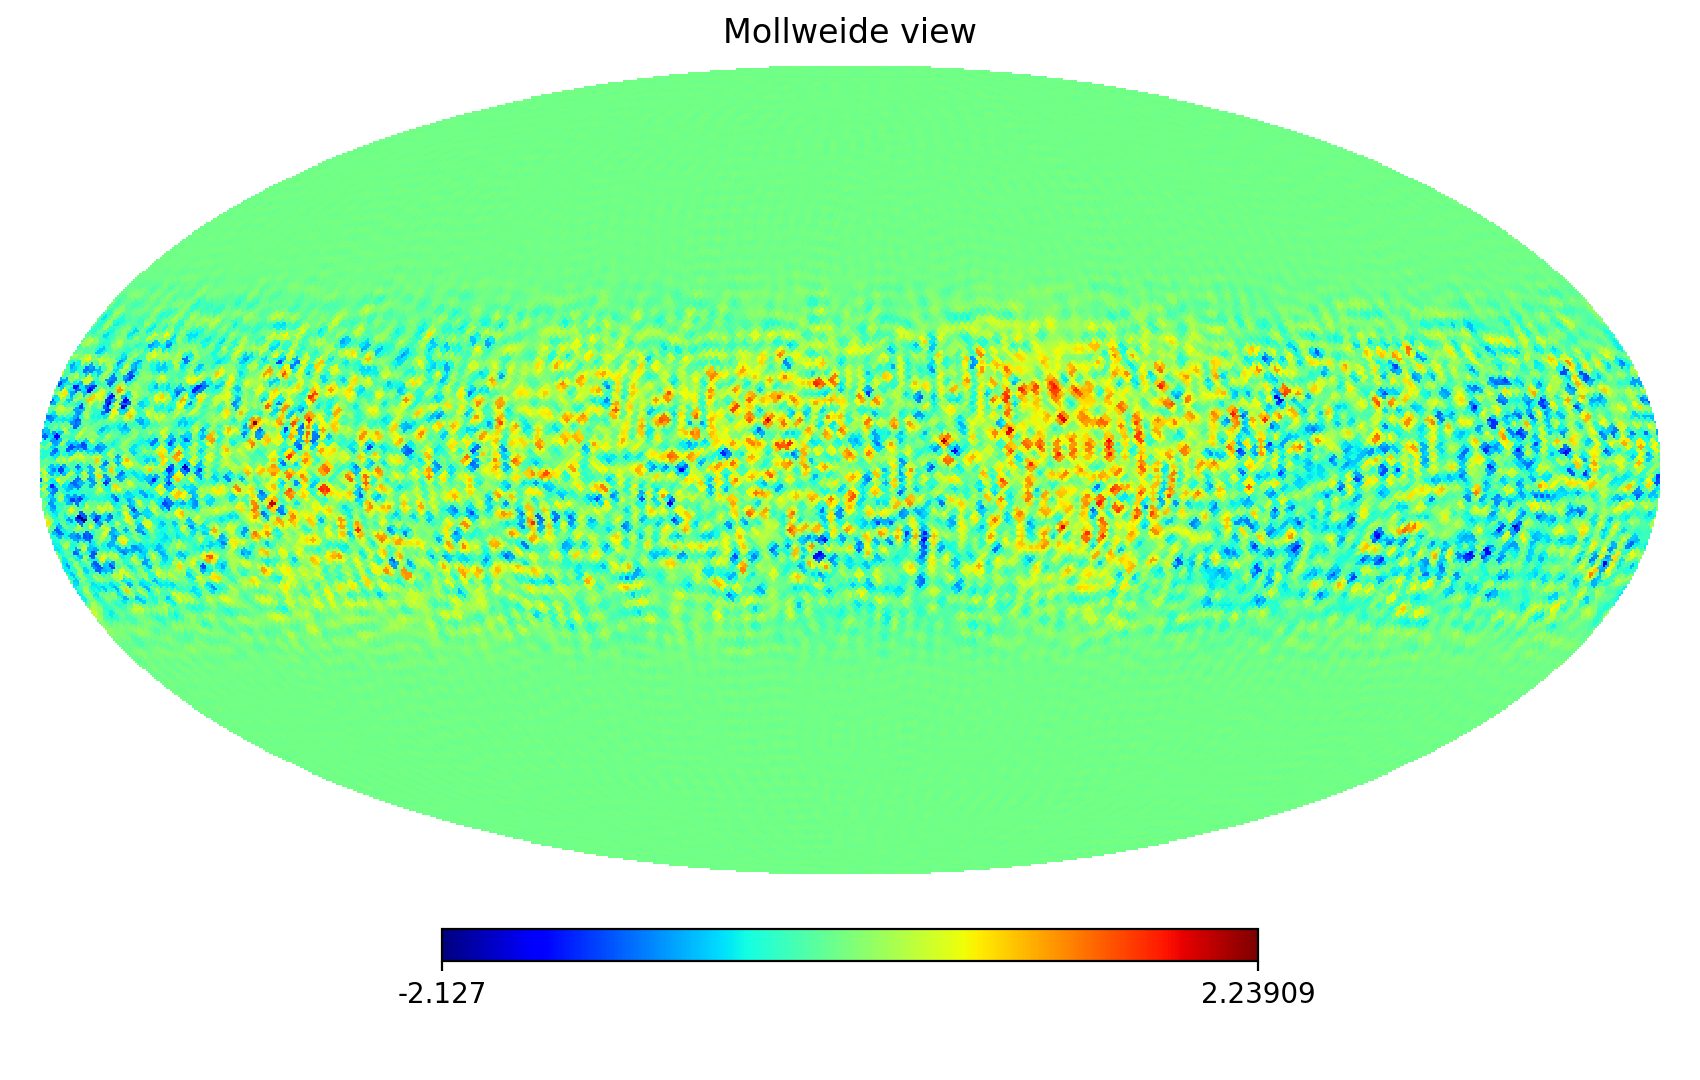

<IPython.core.display.Javascript object>


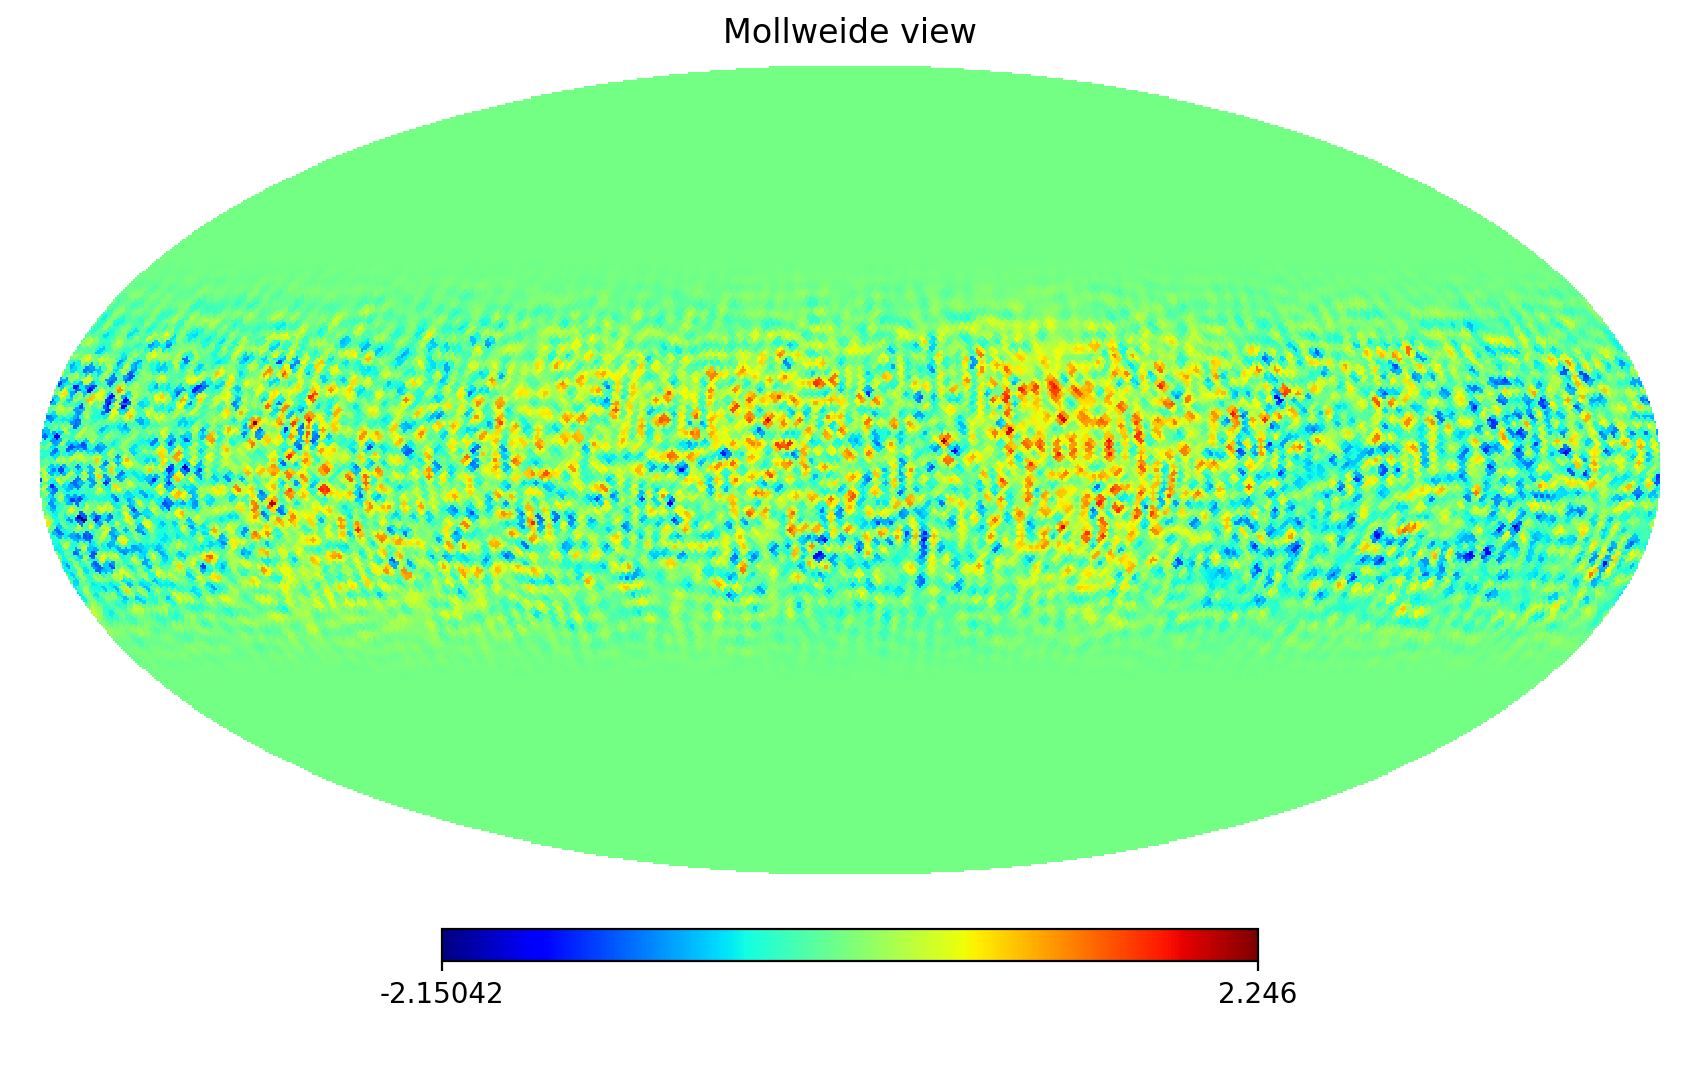

In [482]:
h.mollview(htqu[1]-din[1]*0.)
h.mollview(d[1])

<IPython.core.display.Javascript object>


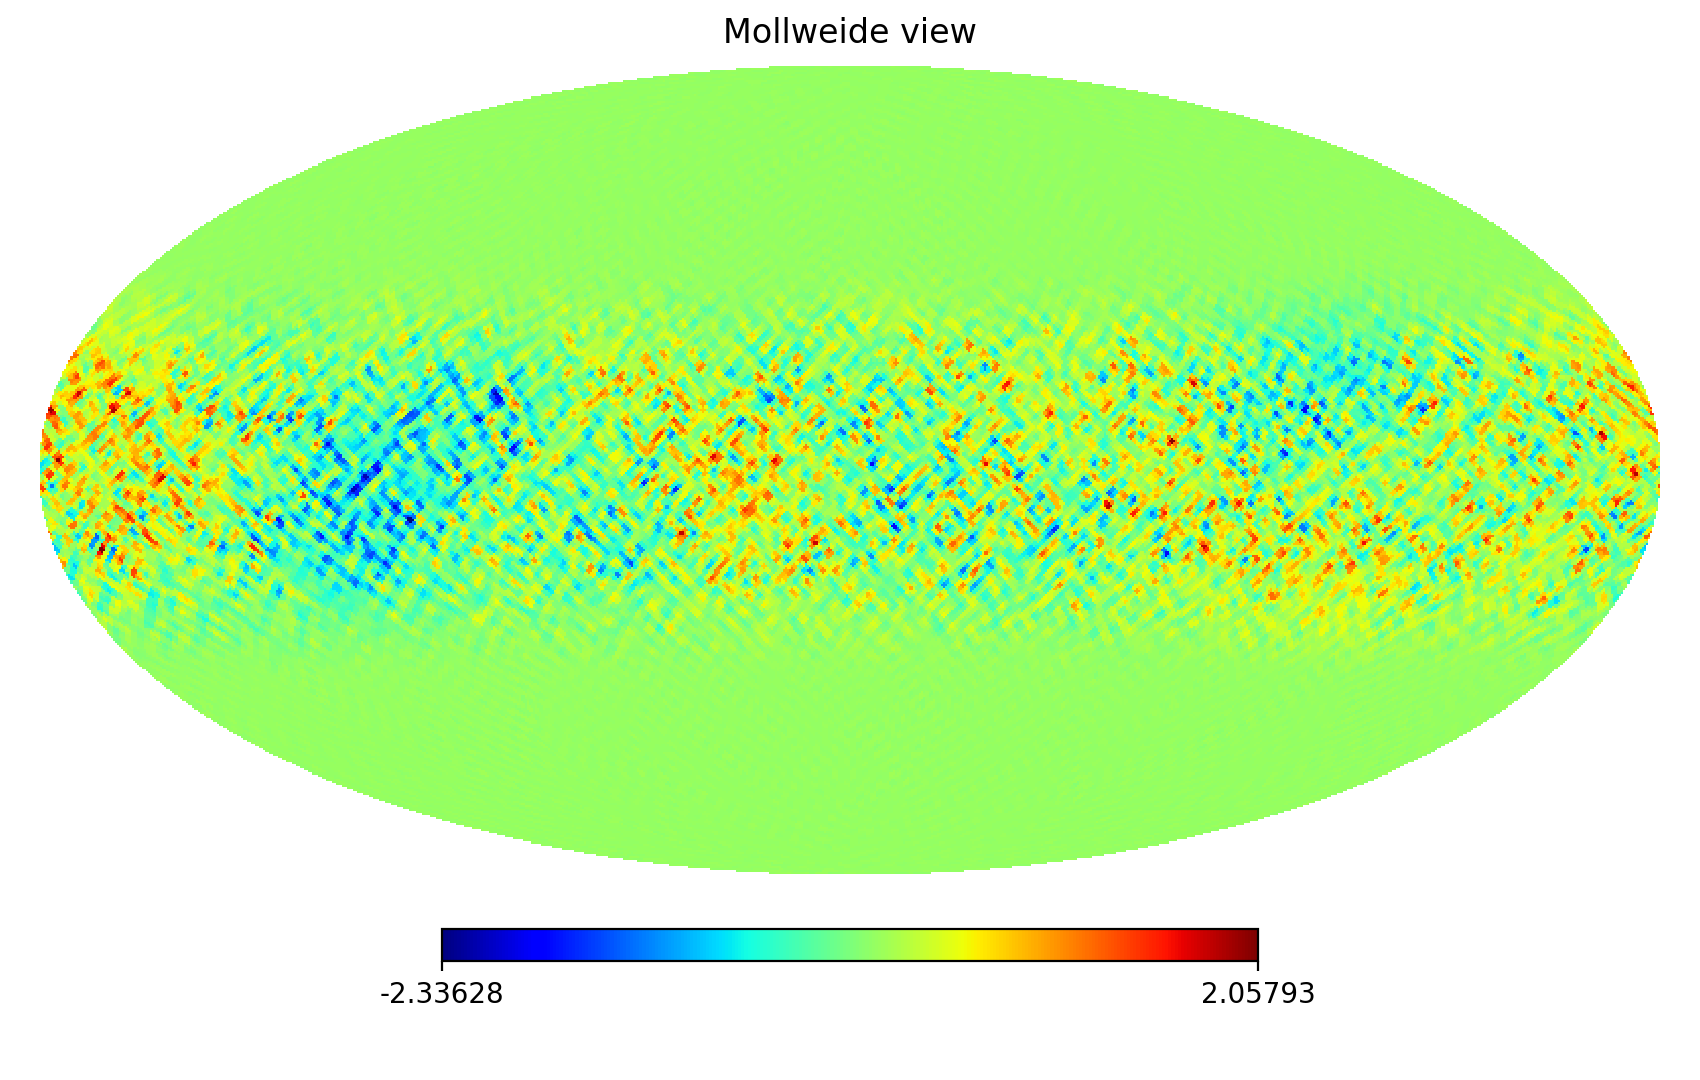

<IPython.core.display.Javascript object>


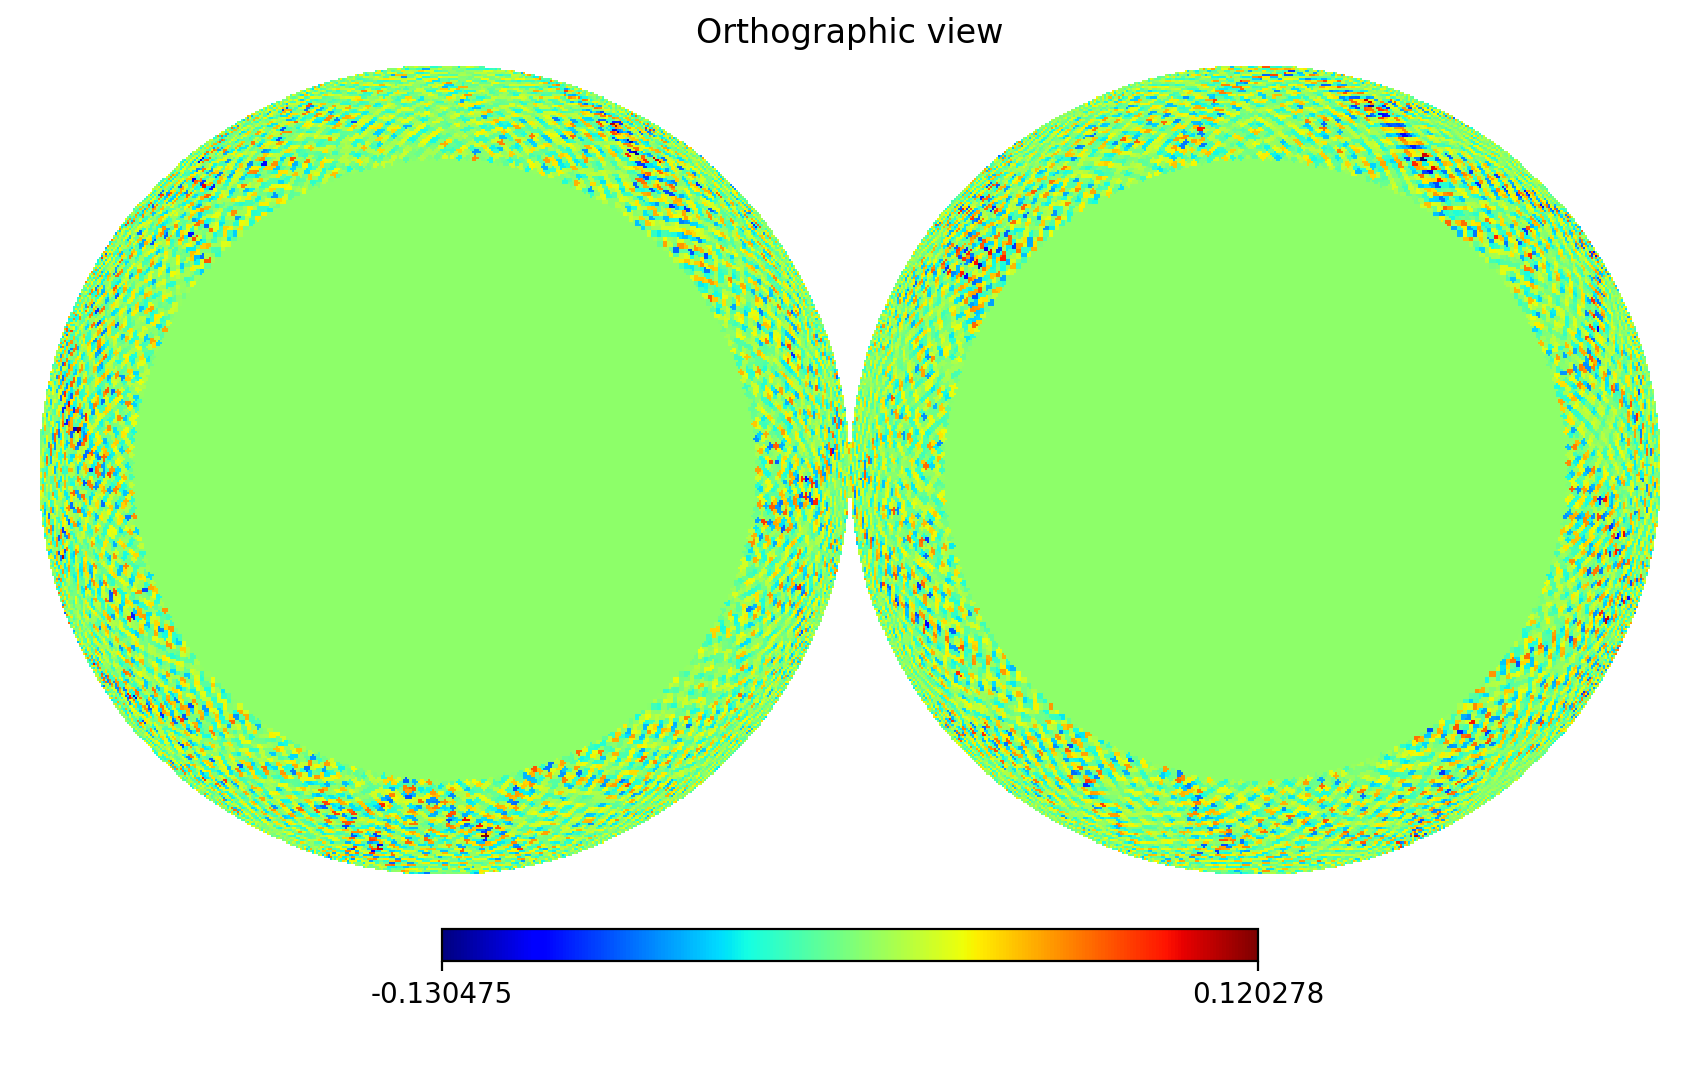

In [483]:
h.mollview((htqu[2]-0*d[2]))
h.orthview((htqu[2]-d[2])*smask,rot=(0,90))

<IPython.core.display.Javascript object>


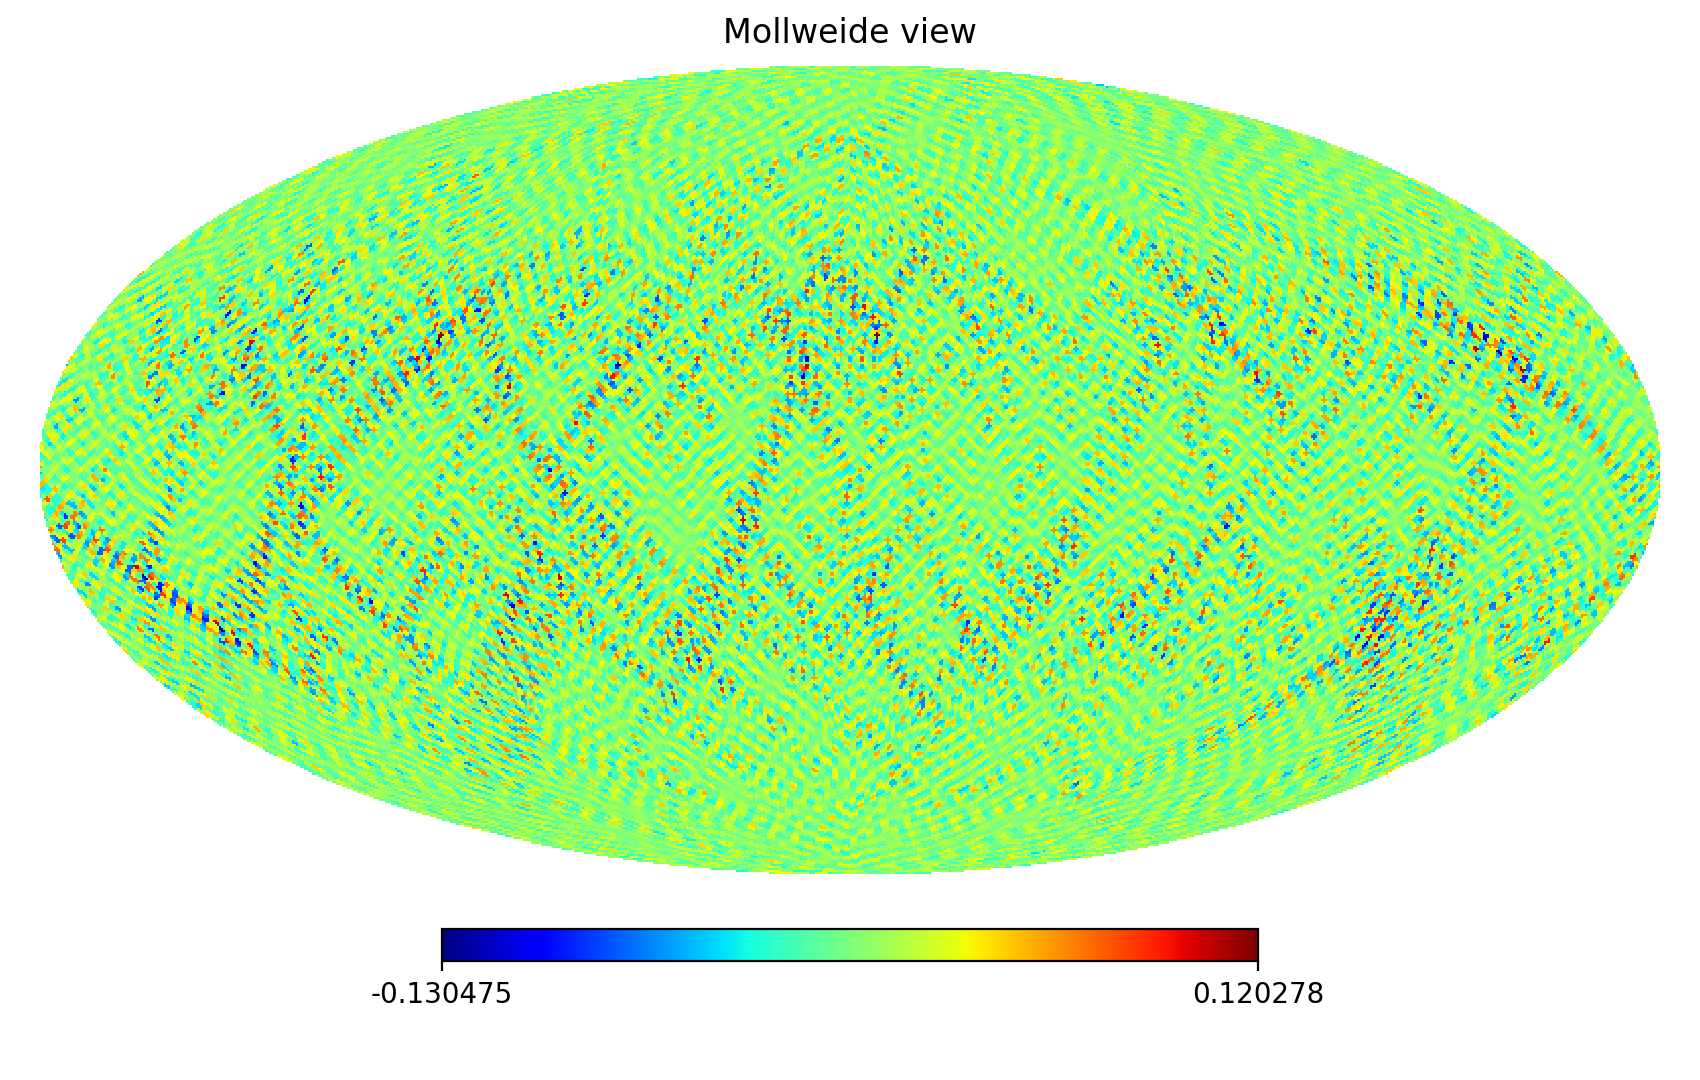

<IPython.core.display.Javascript object>


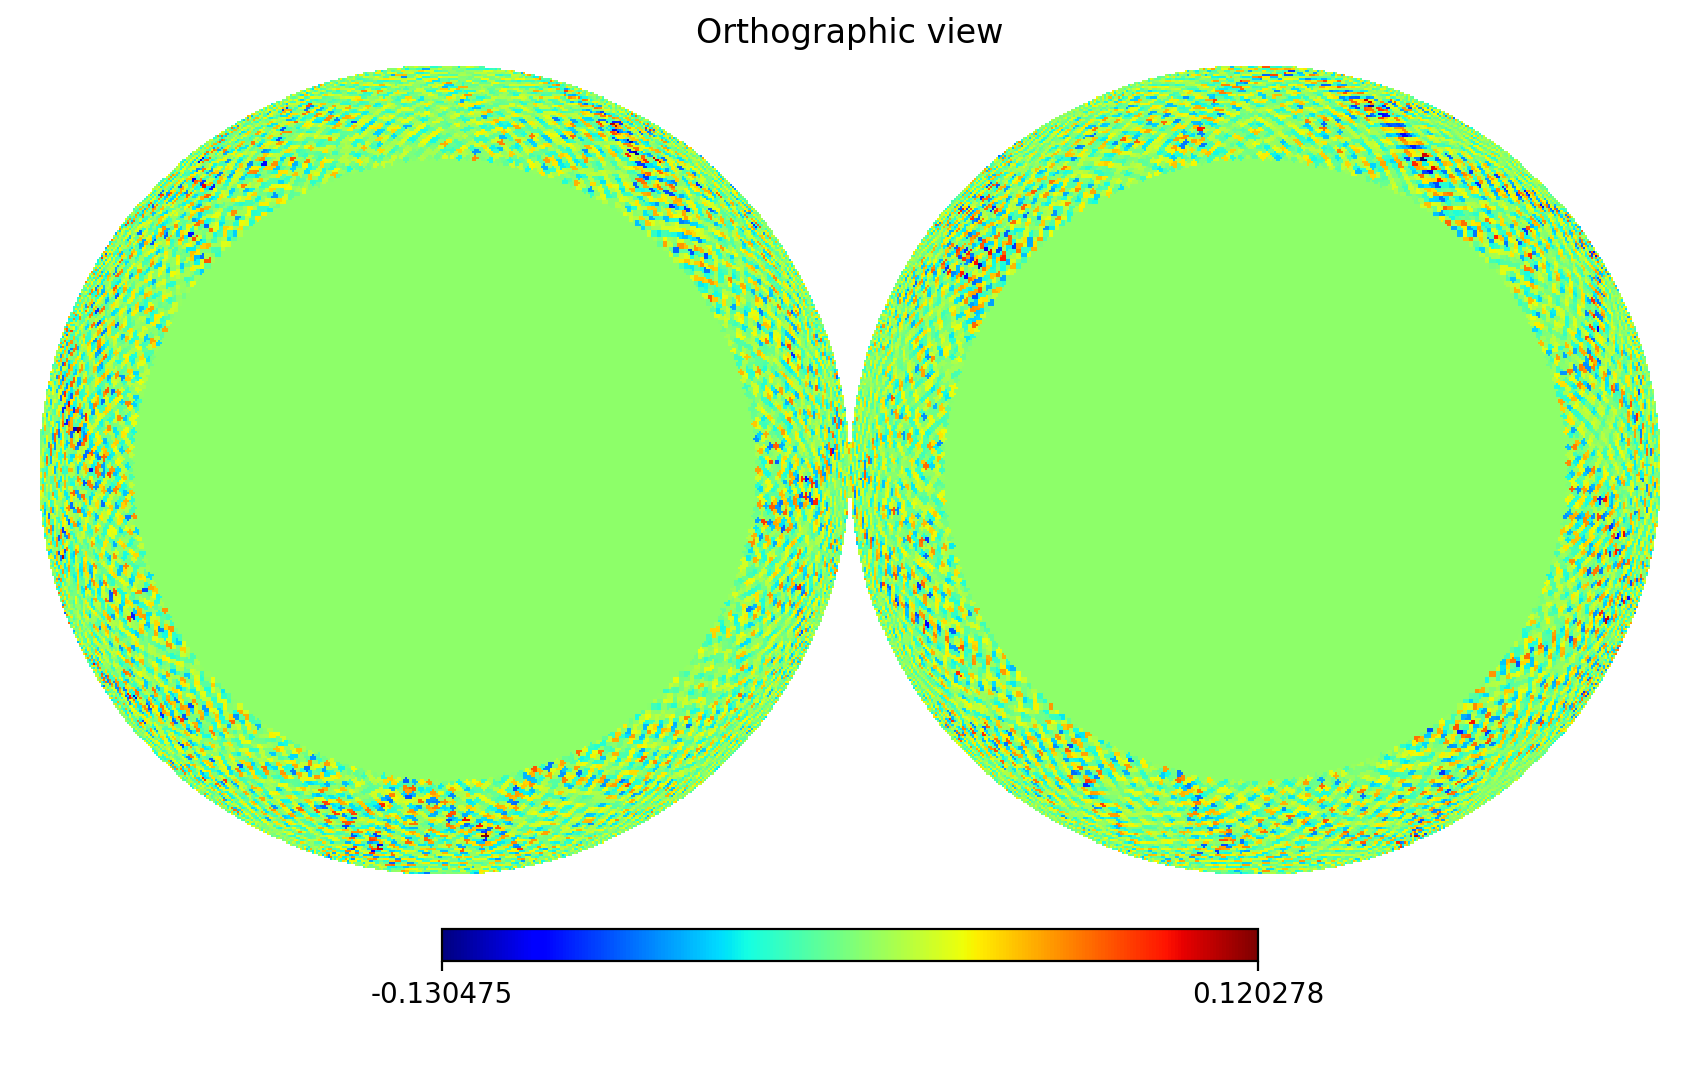

In [476]:
h.mollview((htqu[2]-d[2]))
h.orthview((htqu[2]-d[2])*smask,rot=(0,90))

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


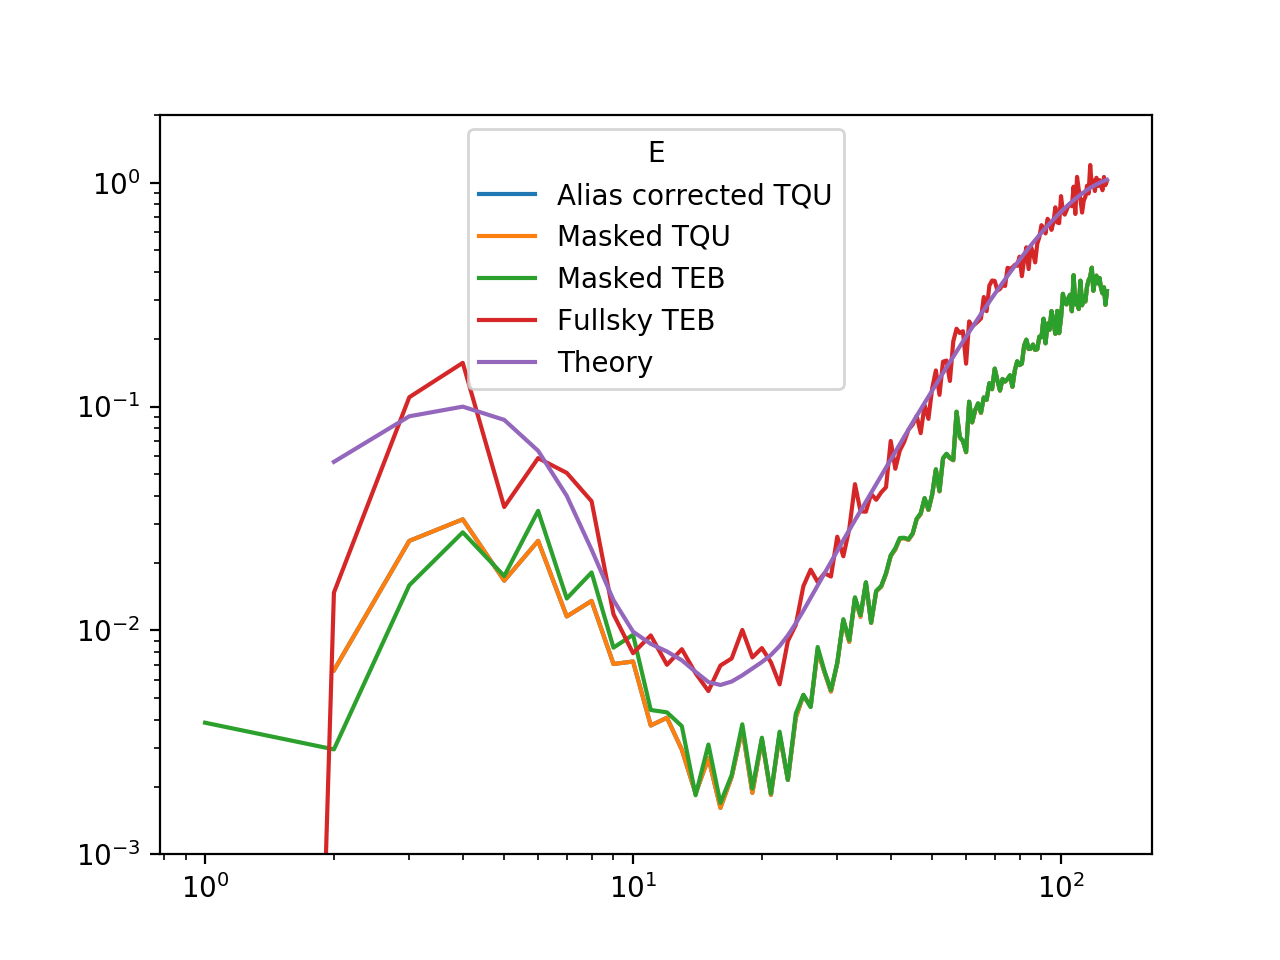

<IPython.core.display.Javascript object>


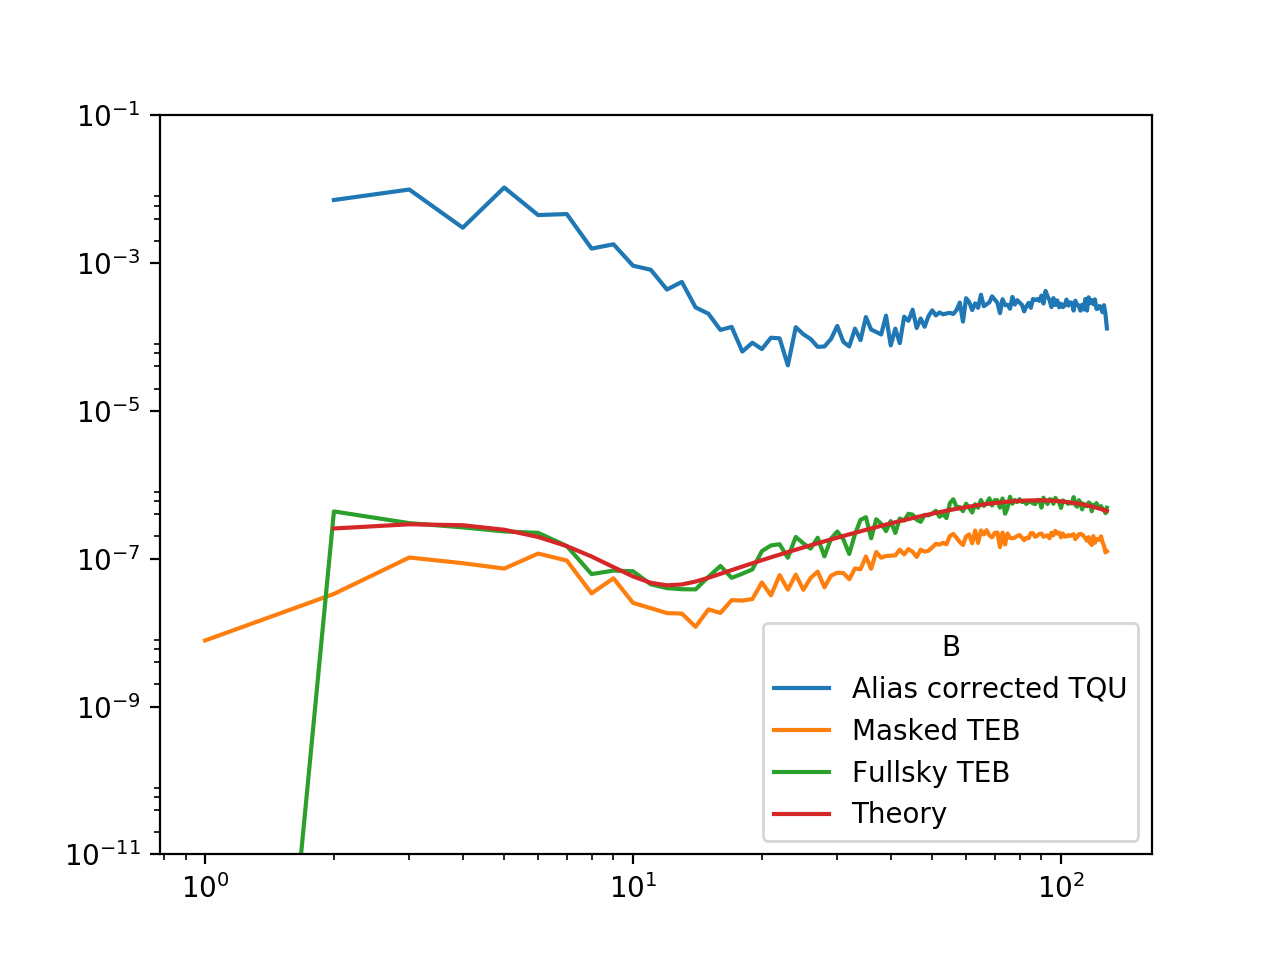

(1e-11, 0.1)

In [484]:
teb=h.alm2map(h.map2alm(tqu,lmax=lmax,iter=hiter),nside,pol=False)
clteb=h.alm2cl(h.map2alm(teb*mask,lmax=lmax,pol=False,iter=hiter))
cltebfs=h.alm2cl(h.map2alm(teb,lmax=lmax,pol=False,iter=hiter))
clhtqu=h.alm2cl(h.map2alm(htqu,lmax=lmax,pol=True,iter=hiter))
cltqu=h.alm2cl(h.map2alm(tqu*mask,lmax=lmax,pol=True,iter=hiter))

ell=arange(lmax+1) ; fll=ell*(ell+1)/(2.*pi)

figure()
plot(ell,fll*clhtqu[1],label="Alias corrected TQU")
plot(ell,fll*cltqu[1],label="Masked TQU")
plot(ell,fll*clteb[1],label="Masked TEB")
plot(ell,fll*cltebfs[1],label="Fullsky TEB")
plot(ell,fll*clr[1][:lmax+1],label="Theory")
loglog()
legend(loc=0,title="E")
ylim(1e-3,2)

figure()
plot(ell,fll*clhtqu[2],label="Alias corrected TQU")
#plot(ell,fll*cltqu[2],label="Masked TQU")
plot(ell,fll*clteb[2],label="Masked TEB")
plot(ell,fll*cltebfs[2],label="Fullsky TEB")
plot(ell,fll*clr[2][:lmax+1],label="Theory")
legend(loc=0,title="B")
loglog()
ylim(1e-11,1e-1)

<IPython.core.display.Javascript object>


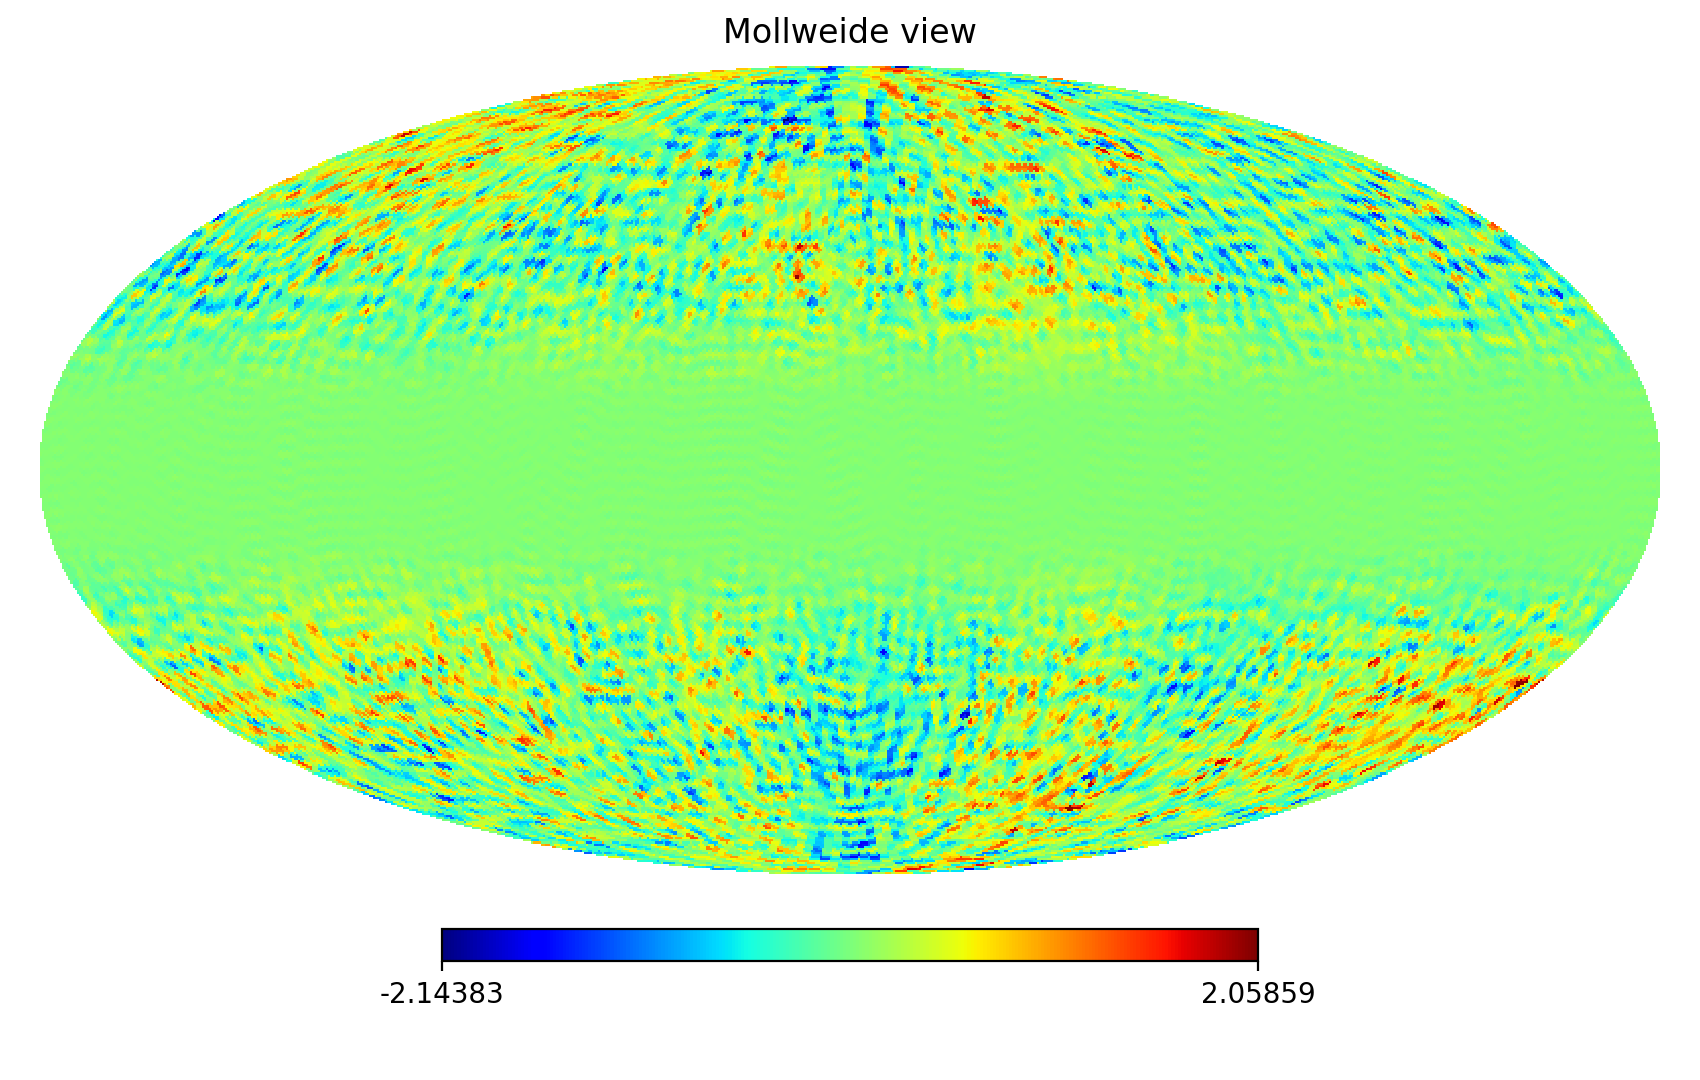

<IPython.core.display.Javascript object>


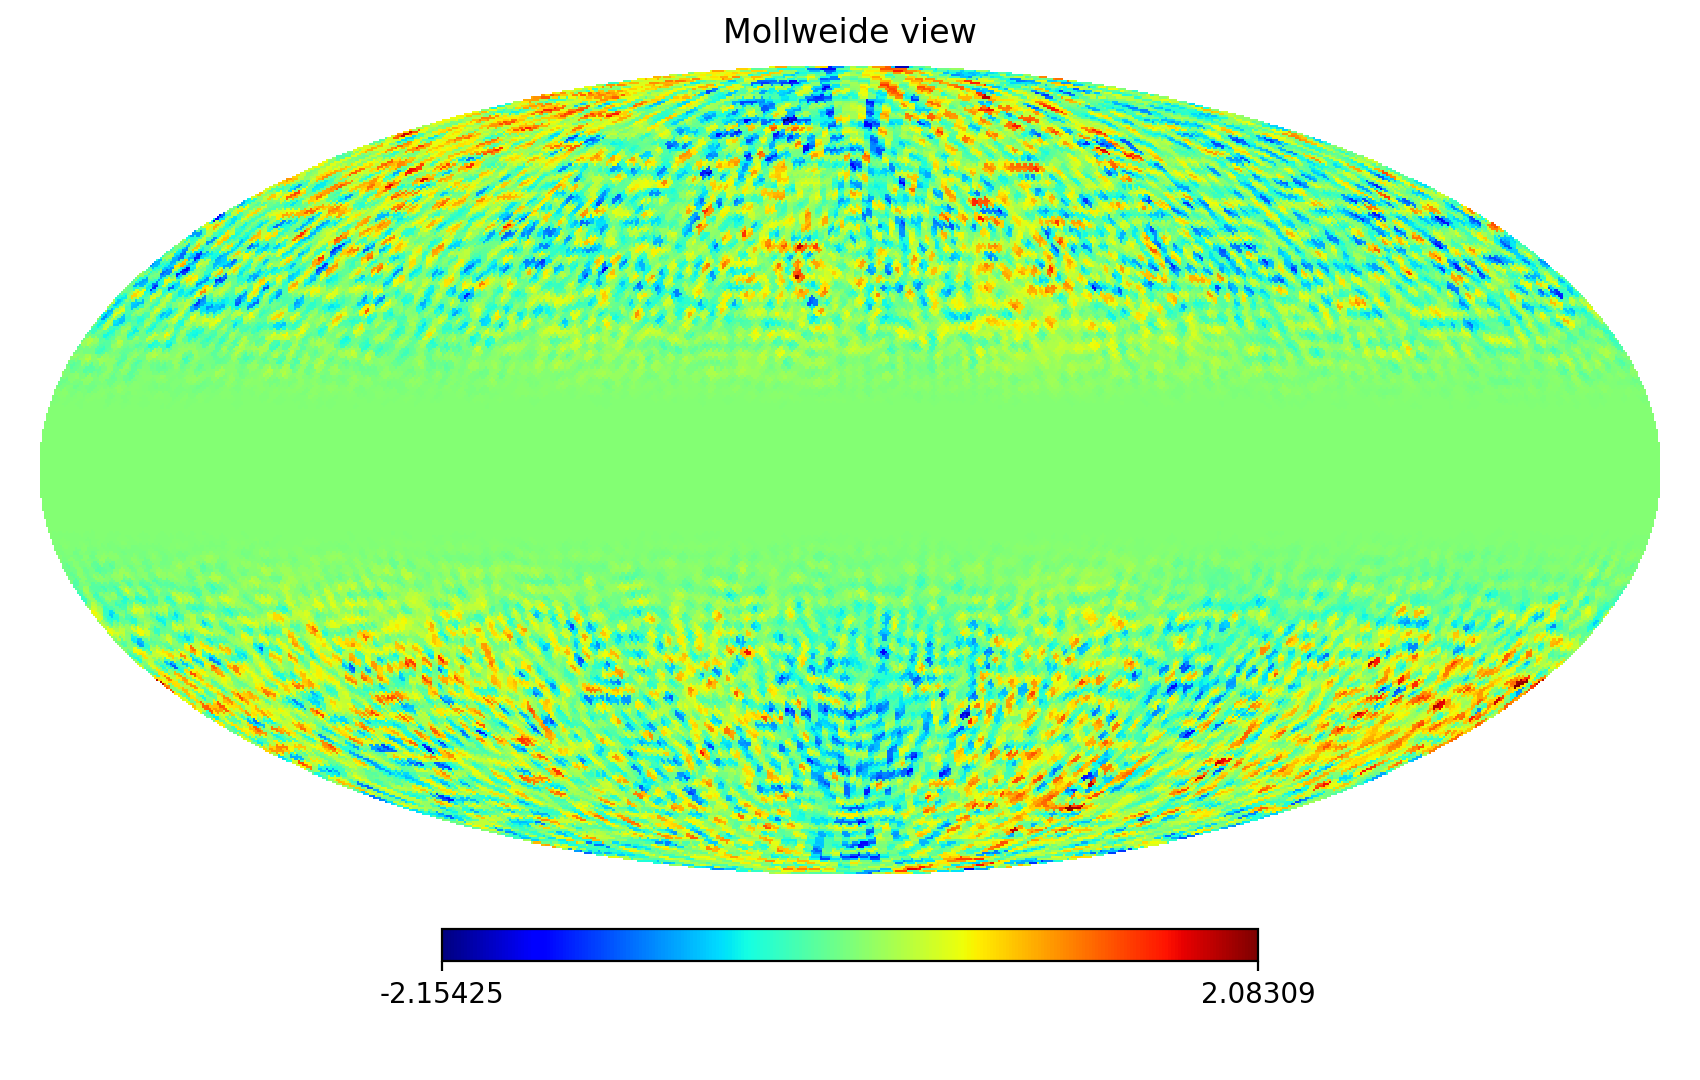

In [442]:
h.mollview(htqu[1])
h.mollview(d[1])